In [48]:
# Import numpy library
import numpy as np
# additional numpy exercise/short tutorial here
# from Carlo Mancini here:
# https://www.roma1.infn.it/~mancinit/Teaching/Alghero24/02-numpy-minimal.slides.html#/

#numpy is a library to handle and process efficiently data in python
# (avoiding explicit and slow python loops)
#numpy handles multidimensional arrays (aka tensors and allows to make various operations on them)
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr_2d[0][0])  # Prints 1
print(arr_2d[1][2])  # Prints 6
print(arr_2d)



1
6
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [49]:
# numpy allows to "slice" arrays
# using brackets [] and :
#   the syntax is: array[start:stop:step]
a = np.arange(10) #this creates an array with numbers from 0 to 9
print(a[2:5])       # [2 3 4]
print(a[:])         # [0 1 2 3 4 5 6 7 8 9]
print(a[0:-1])      # [0 1 2 3 4 5 6 7 8]
print(a[0:6])       # [0 1 2 3 4 5]
print(a[7:])        # [7 8 9]
print(a[5:-1])      # [5 6 7 8]
print(a[0:5:2])     # [0 2 4]
print(a[::-1])      # [9 8 7 6 5 4 3 2 1 0]

#we can also slice our arr_2d specifying multiple indices
print(arr_2d[:, 2])  # [[1 2 3] [4 5 6]]

[2 3 4]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5]
[7 8 9]
[5 6 7 8]
[0 2 4]
[9 8 7 6 5 4 3 2 1 0]
[3 6 9]


In [50]:
#A numpy tensor has a "shape" that is a tuple of numbers with the length of tensor on each index.
#Let's check the shape of our "a" and "arr_2d" tensors
print("shape of 'a' is ", a.shape)
print("shape of 'arr_2d' is ", arr_2d.shape)
print(arr_2d.reshape( (9,1) ))

shape of 'a' is  (10,)
shape of 'arr_2d' is  (3, 3)
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


Now let's load some real data in a numpy array.
We will take a dataset with flowers (iris) classification data. For each example in the dataset there are 4 properties of the dataset (length and width of petals and sepals) and the "true" class of flower.

In [51]:
# **Load Dataset from CSV **

# Download a sample dataset (Iris dataset)
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
!head iris.data

# Load the dataset using NumPy
data = np.genfromtxt('iris.data', delimiter=',', dtype=str)

--2025-06-09 11:05:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.data.1’

iris.data.1             [ <=>                ]   4.44K  --.-KB/s    in 0s      

2025-06-09 11:05:26 (49.3 MB/s) - ‘iris.data.1’ saved [4551]

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa


Let's check that the dataset is correctly load:
   - check its shape
   - check the content of the first few lines

In [52]:
print("Tensor shape:",data.shape)
print("First 10 lines:\n",data[:10])

# it should be clear from the output that
#  - the first index is running on the various "examples" of the dataset (the various rows in the file we downloaded)
#  - the second index is corresponding to the "columns" of the file i.e. the 4 features and the flower class

Tensor shape: (150, 5)
First 10 lines:
 [['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']
 ['5.4' '3.9' '1.7' '0.4' 'Iris-setosa']
 ['4.6' '3.4' '1.4' '0.3' 'Iris-setosa']
 ['5.0' '3.4' '1.5' '0.2' 'Iris-setosa']
 ['4.4' '2.9' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.1' '1.5' '0.1' 'Iris-setosa']]


Now we should split the tensor in two tensors:
  - a tensor with the "input features" (let's call it **X**)
  - a tensor with the "targets/labels" (let's call it **y**)

In our dataset the last column is the target (so we can use position "-1" to reference to it)


In [53]:
X = data[:,:-1].astype('float')    # Features (all columns except the last) convert the strings to float
y = data[:, -1]     # Target (last column)

print("X first lines:\n",X[:5])
print("y first lines:\n",y[:150])
print(X.shape)
print(y.shape)

X first lines:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y first lines:
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolo

We can process the **y** tensor that is a tensor of strings to make it either such that for each class we have a different number or to the one-hot encoding format where for each class we have an additional index.
In scikit learn a couple of functions exists to do that

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y_numerical=le.transform(y)
print("y_numerical :\n",y_numerical)

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y)
y_onehot=lb.transform(y)
print("y_onehot :\n",y_onehot)
print("y_onehot shape :\n",y_onehot.shape)



y_numerical :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y_onehot :
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 

We can now split the dataset into a training and test part.
We can do it
   - with the predefined train_test_split function from scikit learn
   - or by hand keeping in mind that:
      - we may want to shuffle the data if (as in our case) the dataset is sorted somehow (in this case by target label)
      - if we shuffle, we need to shuffle the same way both *X* and *y* (or we should have shuffled the *data* tensor earlier

In [55]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(
  X, y_onehot, test_size=0.2, random_state=42)   ## FILL the dots


#Alternative
#nsamples=X.shape[0]
#indices=np.random.permutation(nsamples)
#X_shuff=X[indices]
#y_shuff=y[indices]
#print(y_shuff)
#X_train=X_shuff[:nsamples/2]
#X_test=X_shuff[nsamples/2:]
#y_train=y_shuff[:nsamples/2]
#y_test=y_shuff[nsamples/2:]

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X, y_numerical, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler only on training data
X_train_scaled = X_train.copy()
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data using the same scaler
X_val_scaled = X_val.copy()
X_val_scaled = scaler.transform(X_val)

# Now you have:
# - X_train_scaled: scaled training data
# - X_val_scaled: scaled validation data
# - y_train, y_val: targets


Now we can explore our dataset to understand better what we are going to do:
   - print some summary statistics (e.g. mean, std,min, max)
   - make some plot (you can import matplotlib and plot some features or some correlations)


📊 Feature Statistics (Original Data):
Feature 0: Mean=5.8433, Std=0.8253, Min=4.3000, Max=7.9000
Feature 1: Mean=3.0540, Std=0.4321, Min=2.0000, Max=4.4000
Feature 2: Mean=3.7587, Std=1.7585, Min=1.0000, Max=6.9000
Feature 3: Mean=1.1987, Std=0.7606, Min=0.1000, Max=2.5000

📊 Feature Statistics (Scaled Training Data):
Feature 0: Mean=0.0000, Std=1.0000, Min=-1.8396, Max=2.3049
Feature 1: Mean=-0.0000, Std=1.0000, Min=-2.3789, Max=3.0200
Feature 2: Mean=-0.0000, Std=1.0000, Min=-1.5640, Max=1.7045
Feature 3: Mean=-0.0000, Std=1.0000, Min=-1.4428, Max=1.7560


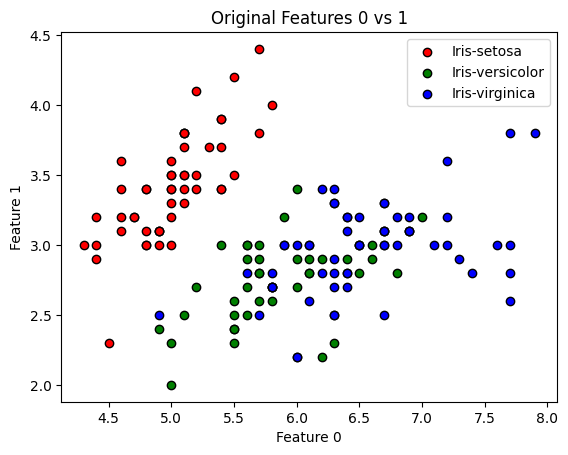

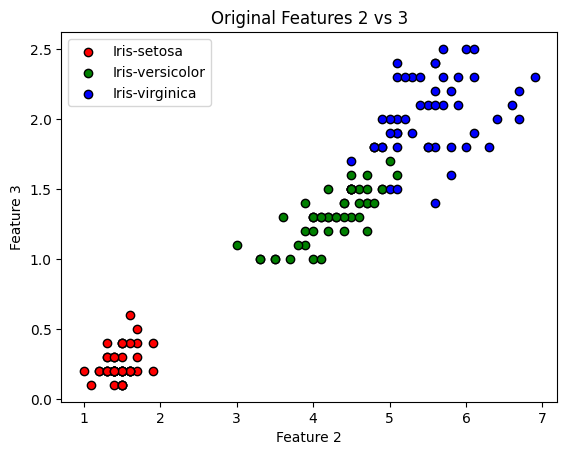

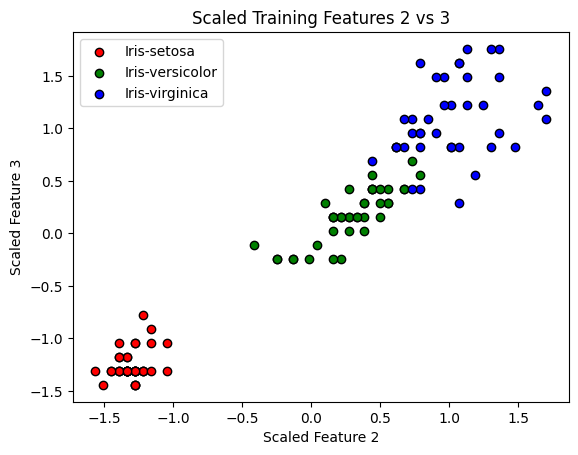

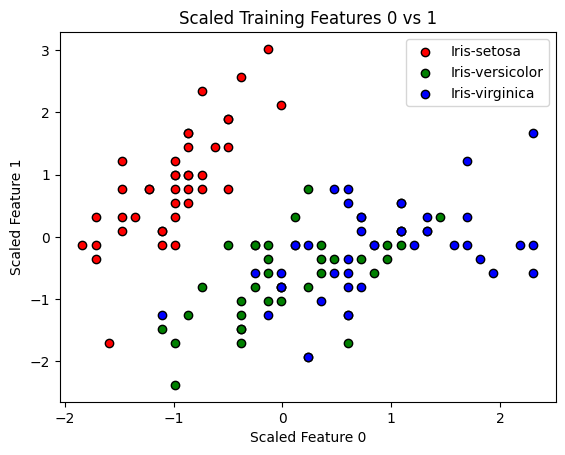

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Class labels and colors
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'green', 'blue']

# --- Print statistics for original data ---
print("\n📊 Feature Statistics (Original Data):")
for i in range(X.shape[1]):
    print(f"Feature {i}: Mean={X[:, i].mean():.4f}, Std={X[:, i].std():.4f}, Min={X[:, i].min():.4f}, Max={X[:, i].max():.4f}")

# --- Print statistics for scaled training data ---
print("\n📊 Feature Statistics (Scaled Training Data):")
for i in range(X_train_scaled.shape[1]):
    print(f"Feature {i}: Mean={X_train_scaled[:, i].mean():.4f}, Std={X_train_scaled[:, i].std():.4f}, Min={X_train_scaled[:, i].min():.4f}, Max={X_train_scaled[:, i].max():.4f}")

# --- Original features 0 and 1 ---
plt.figure()
for class_index, class_name in enumerate(class_names):
    plt.scatter(
        X[y_numerical == class_index, 0],
        X[y_numerical == class_index, 1],
        label=class_name,
        color=colors[class_index],
        edgecolor='k'
    )
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Original Features 0 vs 1")
plt.legend()
plt.show()

# --- Original features 2 and 3 ---
plt.figure()
for class_index, class_name in enumerate(class_names):
    plt.scatter(
        X[y_numerical == class_index, 2],
        X[y_numerical == class_index, 3],
        label=class_name,
        color=colors[class_index],
        edgecolor='k'
    )
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.title("Original Features 2 vs 3")
plt.legend()
plt.show()

# --- Scaled features 2 and 3 (training set) ---
plt.figure()
for class_index, class_name in enumerate(class_names):
    plt.scatter(
        X_train_scaled[y_train == class_index, 2],
        X_train_scaled[y_train == class_index, 3],
        label=class_name,
        color=colors[class_index],
        edgecolor='k'
    )
plt.xlabel("Scaled Feature 2")
plt.ylabel("Scaled Feature 3")
plt.title("Scaled Training Features 2 vs 3")
plt.legend()
plt.show()

# --- Scaled features 0 and 1 (training set) ---
plt.figure()
for class_index, class_name in enumerate(class_names):
    plt.scatter(
        X_train_scaled[y_train == class_index, 0],
        X_train_scaled[y_train == class_index, 1],
        label=class_name,
        color=colors[class_index],
        edgecolor='k'
    )
plt.xlabel("Scaled Feature 0")
plt.ylabel("Scaled Feature 1")
plt.title("Scaled Training Features 0 vs 1")
plt.legend()
plt.show()


Now we can try to train a simple model from the many available in scikit learn

In [58]:
# **5. Train a Simple Scikit-learn Model (Logistic Regression)**
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter if needed

# Train the model
model.fit(X_train, y_train)

# Create a Logistic Regression model
model_scaled = LogisticRegression(max_iter=200)  # Increase max_iter if needed

# Train the model
model_scaled.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200)

Once the model is trained we can test on the validation dataset

In [59]:
# **6. Evaluate the Model**

# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred_scaled = model_scaled.predict(X_val_scaled)

# Optional: View first few predictions
#print(y_pred[:5])
#print(y_val_labels[:5])

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy_scaled = accuracy_score(y_val, y_pred_scaled)
print("\nAccuracy:", accuracy)
print("\nAccuracy:", accuracy_scaled)
# Optional: Manual check
#print(np.sum(y_val_labels == y_pred) / y_val_labels.shape[0])



Accuracy: 1.0

Accuracy: 1.0
